In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
from sklearn.datasets import make_classification

In [33]:
x,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=1,n_redundant=0,class_sep=1.5)

In [34]:
df=pd.DataFrame(x,columns=['feature1','feature2'])
df['class']=y
df.head()

feature1  feature2  class
0  0.808963 -0.542916      0
1 -1.705644 -2.634714      1
2 -1.996602 -1.989624      1
3 -1.273500 -2.317394      1
4 -1.872202  0.449962      1

<Axes: xlabel='feature1', ylabel='feature2'>

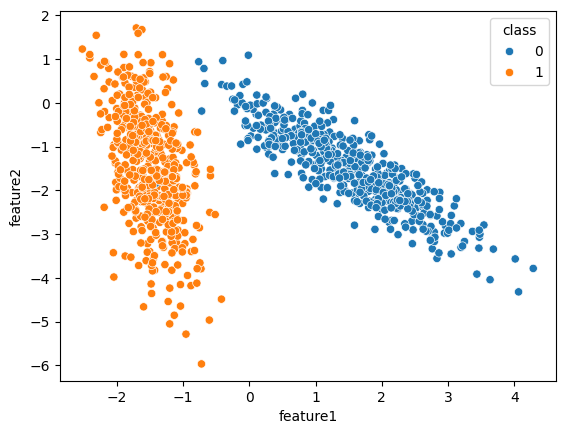

In [35]:
sns.scatterplot(data=df, x='feature1',y='feature2',hue='class')

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [37]:
from sklearn.svm import SVC

svc=SVC(kernel='linear')

In [38]:
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [39]:
y_pred=svc.predict(x_test)

In [41]:
acc=svc.score(x_test,y_test)
acc

0.9966666666666667

In [43]:
from sklearn.metrics import classification_report,confusion_matrix

In [44]:
confusion_matrix(y_test,y_pred)

array([[151,   1],
       [  0, 148]], dtype=int64)

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       152
           1       0.99      1.00      1.00       148

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [46]:
# part 2

In [49]:
x,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)
df=pd.DataFrame(x,columns=['feature1','feature2'])
df['class']=y
df.head()

feature1  feature2  class
0  1.881586 -0.264505      1
1 -1.421336  0.133168      0
2 -2.198382 -0.594427      0
3 -0.470245  0.008581      1
4 -0.813082  1.764836      0

<Axes: xlabel='feature1', ylabel='feature2'>

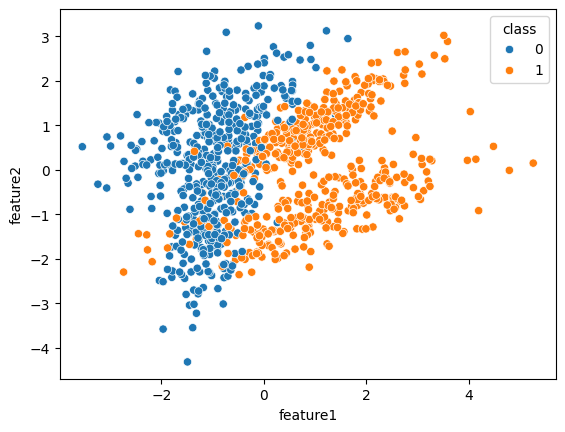

In [50]:
sns.scatterplot(data=df, x='feature1',y='feature2',hue='class')

In [51]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [52]:
from sklearn.svm import SVC

svc=SVC(kernel='linear')

In [53]:
svc.fit(x_train,y_train)
acc=svc.score(x_test,y_test)
acc

0.8833333333333333

In [54]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
acc=svc.score(x_test,y_test)
acc

0.89

In [57]:
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
acc=svc.score(x_test,y_test)

acc

0.81

In [58]:
svc=SVC(kernel='sigmoid')
svc.fit(x_train,y_train)
acc=svc.score(x_test,y_test)

acc

0.76

In [61]:
from sklearn.model_selection import GridSearchCV

params ={
 'C':[0.1,1,10,100],
   'gamma':[1,0.1,0.01,0.001,0.0001],
    'kernel':['rbf']
}   

In [62]:
model=SVC()


grid= GridSearchCV( estimator=model, param_grid=params,cv=5,verbose=3)

In [63]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.929 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.914 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.914 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.971 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.950 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.850 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.864 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [64]:
acc=grid.score(x_test,y_test)

acc

0.9133333333333333

In [65]:
grid.best_estimator_

SVC(C=10, gamma=1)

In [66]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}